In [182]:
import pandas as pd
import numpy as np

In [183]:
DATA_PATH = '../data/'
POSTPROCESSING = 'postprocessing/'
RAW = 'raw/'

In [184]:
content = pd.read_csv(f"{DATA_PATH}{RAW}content.csv", index_col='content_uid')
content.head()

,name,type,serial_id,genres,duration_seconds
content_uid,,,,,
9882,"""Шоу ""Студия ""Союз""",serial_with_season,NaN,"Игровое шоу,Музыка",NaN
13701,"""Шоу ""Студия ""Союз""",episode,9882.0,NaN,2823.0
12274,"""Шоу ""Студия ""Союз""",episode,9882.0,NaN,2694.0
13579,"""Шоу ""Студия ""Союз""",episode,9882.0,NaN,2739.0
18055,"""Шоу ""Студия ""Союз""",episode,9882.0,NaN,2887.0


In [185]:
history = pd.read_csv(f'{DATA_PATH}{RAW}watch_history.csv')
history.head()

,user_uid,content_uid,second
0,1,26719,400
1,1,11882,627
2,1,26174,5693
3,4,28436,828
4,4,3836,64


In [186]:
# построить гистограмму по типам
np.unique(content['type'], return_counts=True)

(array(['episode', 'movie', 'serial_with_season', 'serial_without_season'],
       dtype=object),
 array([13466,  3146,   669,    16], dtype=int64))

array([[<AxesSubplot:title={'center':'count_nan'}>]], dtype=object)

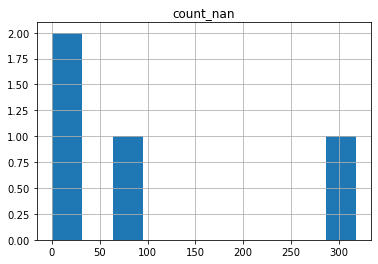

In [187]:
# построить гистограмму пропусков
content.groupby(by=['type']).agg(
    count_nan = pd.NamedAgg(column='duration_seconds', aggfunc=lambda x: x.isna().sum())
).hist()

In [188]:
# пропущенные длительноть фильмов можно колво отобразить

miss_duration = content[(content['type'] == 'movie') &
                        (content['duration_seconds'].isna())].index.to_list()
print(len(miss_duration))

68


In [189]:
collect_data_path = '../data/raw/missed_movies.csv'
collect_data = pd.read_csv(collect_data_path, index_col=1)

In [190]:
delete_list = collect_data[collect_data['duration_seconds'].isna()].index.to_list()
delete_list

[25226]

In [191]:
content.loc[collect_data.index, 'duration_seconds'] = collect_data['duration_seconds'] * 60

In [192]:
history = history.drop(history[history.index.isin(delete_list)].index)
content = content.drop(content[content.index.isin(delete_list)].index)

Выше не смотрим

In [193]:
content[content.name == 'Городские легенды']


,name,type,serial_id,genres,duration_seconds
content_uid,,,,,
3843,Городские легенды,serial_with_season,NaN,Комедия,NaN
12963,Городские легенды,episode,3843.0,Комедия,1423.0
12962,Городские легенды,episode,3843.0,Комедия,1328.0
20630,Городские легенды,serial_with_season,NaN,"Документальный,Мистика",NaN
20738,Городские легенды,episode,20630.0,Документальный,2579.0
20640,Городские легенды,episode,20630.0,Документальный,2546.0
20600,Городские легенды,episode,20630.0,Документальный,2575.0
20548,Городские легенды,episode,20630.0,Документальный,2667.0
20647,Городские легенды,episode,20630.0,Документальный,2580.0


In [194]:
seasons_serials_duration = content[content.type.isin(['episode'])][['serial_id', 'duration_seconds']].groupby(by='serial_id').sum()
seasons_serials_duration


,duration_seconds
serial_id,
250.0,2605.0
551.0,34311.0
691.0,10652.0
841.0,42302.0
992.0,44345.0
...,...
30165.0,80412.0
30266.0,61665.0
30407.0,56563.0


In [195]:
content.loc[seasons_serials_duration.index, 'duration_seconds'] = seasons_serials_duration

Удаляем контент, без эпизодов => без просморов

In [196]:
id = content[content.duration_seconds.isna()].index
history[history.content_uid.isin(id)]

,user_uid,content_uid,second


In [197]:
content.drop(id, inplace=True)

Тк мы скомпоновали эпизоды по сериалам, сами эпизоды нам не нужны

In [198]:
content.drop(content[content.type == 'episode'].index, inplace=True)

In [199]:
content.groupby(by=['type']).agg(
    count_nan = pd.NamedAgg(column='duration_seconds', aggfunc=lambda x: x.isna().sum())
)

,count_nan
type,
movie,0.0
serial_with_season,0.0
serial_without_season,0.0


In [200]:
content.to_csv(f'{DATA_PATH}{POSTPROCESSING}content.csv')
history.to_csv(f'{DATA_PATH}{POSTPROCESSING}watch_history.csv')
